In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# path = "/content/gdrive/MyDrive/Colab Notebooks/dataset/"
path = '../../Dataset/'

In [4]:
df_users_full = pd.read_csv(path + "users.csv")
df_users1 = df_users_full[["user_id","functional_unit","department"]]
df_users = df_users1[df_users1.functional_unit == "2 - ResearchAndEngineering"]
df_users = df_users[(df_users.department != "1 - Research")]
df_users = pd.DataFrame(df_users)
df_users = df_users.dropna(axis=0)

In [5]:
display(df_users.shape)

(3991, 3)

In [6]:
#read device
df_device = pd.read_csv(path + "device.csv")
df_device.shape

(407908, 5)

In [7]:
#read file
df_file = pd.read_csv(path + "file.csv")
df_file.shape

(434769, 6)

In [8]:
#read logon
df_logon = pd.read_csv(path + "logon.csv")
df_logon.shape

(845351, 5)

In [9]:
# read psychometric
df_psychometric = pd.read_csv(path + "psychometric.csv")
df_psychometric = df_psychometric[['employee_name','user_id','O','C','E', 'A', 'N']]
df_psychometric.shape

(1000, 7)

### Cleaning and merging

In [10]:
# clean user
df_users_clean = df_users.rename(columns= {'user_id':'user'}, inplace=False)
df_users_clean.shape

(3991, 3)

In [11]:
# logon user clean
df_logon_users = pd.merge(df_logon, df_users_clean, on = 'user')
df_logon_users_clean = df_logon_users.drop(columns=['functional_unit', 'department'])
df_logon_users_clean.shape

(3277929, 5)

In [12]:
# device user clean
df_device_users = pd.merge(df_device, df_users_clean, on='user')
df_device_users_clean = df_device_users.drop(columns=['functional_unit','department'])
df_device_users_clean.shape

(1864450, 5)

In [13]:
# file user clean
df_file_users = pd.merge(df_file, df_users_clean, on = 'user')
df_file_users_clean = df_file_users.drop(columns = ['functional_unit', 'department'])
df_file_users_clean.shape

(2347631, 6)

In [14]:
# psychometric users clean
df_psychometric_users = pd.merge(df_psychometric, df_users, on = 'user_id')
df_psychometric_users_clean = df_psychometric_users[['employee_name', 'user_id','O', 'C', 'E','A','N']]
df_psychometric_users_clean.shape

(3991, 7)

### Section - 03 : Feature Engineering

In [15]:
#parsing date column to datetime
df_logon_users_clean['date'] = pd.to_datetime(df_logon_users_clean['date'])

In [16]:
# extract the time from date column add and store in a new column
df_logon_users_clean['time'] = df_logon_users_clean['date'].dt.time
display(df_logon_users_clean.head())

,id,date,user,pc,activity,time
0,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
1,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
2,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
3,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
4,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00


In [17]:
# Subsetting all records for 'Logon' activity
df_user_logon = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logon']
display(df_user_logon.head())

,id,date,user,pc,activity,time
0,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
1,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
2,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
3,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00
4,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00


In [18]:
# add another column 'hour' for calculating mean Logon time 
# time column is an object type and cannot be used for calculating mean
df_user_logon['hour'] = pd.to_datetime(df_user_logon['date'], format='%H:%M').dt.hour
display(df_user_logon.head())

<ipython-input-18-cb58596d7ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_logon['hour'] = pd.to_datetime(df_user_logon['date'], format='%H:%M').dt.hour


,id,date,user,pc,activity,time,hour
0,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
1,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
2,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
3,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
4,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7


In [19]:
# min and max login time of each user
#user_logon_stats_1 = user_logon.groupby
df_user_logon_stats = df_user_logon.groupby('user')['time'].agg([min,max]).reset_index()

In [20]:
df_user_logon_result = df_user_logon.groupby('user')['time'].agg(pd.Series.mode).reset_index()
display(df_user_logon.head())

,id,date,user,pc,activity,time,hour
0,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
1,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
2,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
3,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7
4,{D5B1-I6BP26NF-3845HZNZ},2010-01-01 07:23:00,WXW0044,PC-9422,Logon,07:23:00,7


In [21]:
# To handle the multi-modal situation
## value_counts arranged in descending order so you want to grab the index of the first row
df_logon_mode = df_user_logon.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()
display(df_logon_mode.shape)

(230, 2)

In [22]:
# calculate average (mean) logon time for each user

df_logon_mean = df_user_logon.groupby('user')['hour'].mean().reset_index()
df_logon_mean['hour'].dtype
df_logon_mean['hour'] = pd.to_datetime(df_logon_mean['hour'], format='%H').dt.time
display(df_logon_mean.head())
display(df_logon_mean.shape)

,user,hour
0,AAN0077,07:00:00
1,AAW0103,07:00:00
2,ACE0265,08:00:00
3,ACL0394,09:00:00
4,ADR0362,07:00:00


(230, 2)

In [23]:
# Adding mode and mean data to user_logon_stats
df_user_logon_stats['mode'] = df_logon_mode['time']
df_user_logon_stats['mean'] = df_logon_mean['hour']
display(df_user_logon_stats.head())
display(df_user_logon_stats.shape)

,user,min,max,mode,mean
0,AAN0077,07:45:00,08:13:00,08:13:00,07:00:00
1,AAW0103,07:00:00,07:18:00,07:15:00,07:00:00
2,ACE0265,08:00:00,08:25:00,08:15:00,08:00:00
3,ACL0394,09:00:00,16:52:37,09:15:00,09:00:00
4,ADR0362,07:30:00,07:48:00,07:48:00,07:00:00


(230, 5)

In [24]:
#for logoff activity
df_user_logoff = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logoff']
display(df_user_logoff.shape)

(1455358, 6)

In [25]:
df_user_logoff['date'] = pd.to_datetime(df_user_logoff['date'])
df_user_logoff['time'] = df_user_logoff['date'].dt.time
df_user_logoff['hour'] = pd.to_datetime(df_user_logoff['date'], format='%H:%M').dt.hour
display(df_user_logoff.head())

<ipython-input-25-73cb9c414980>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_logoff['date'] = pd.to_datetime(df_user_logoff['date'])
<ipython-input-25-73cb9c414980>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_logoff['time'] = df_user_logoff['date'].dt.time
<ipython-input-25-73cb9c414980>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,id,date,user,pc,activity,time,hour
18,{Y4I4-U4IO24KV-8727TSIT},2010-01-01 16:16:00,WXW0044,PC-9422,Logoff,16:16:00,16
19,{Y4I4-U4IO24KV-8727TSIT},2010-01-01 16:16:00,WXW0044,PC-9422,Logoff,16:16:00,16
20,{Y4I4-U4IO24KV-8727TSIT},2010-01-01 16:16:00,WXW0044,PC-9422,Logoff,16:16:00,16
21,{Y4I4-U4IO24KV-8727TSIT},2010-01-01 16:16:00,WXW0044,PC-9422,Logoff,16:16:00,16
22,{Y4I4-U4IO24KV-8727TSIT},2010-01-01 16:16:00,WXW0044,PC-9422,Logoff,16:16:00,16


In [26]:
# min and max logoff time of each user
df_user_logoff_stats = df_user_logoff.groupby('user')['time'].agg([min,max]).reset_index()
display(df_user_logoff_stats.shape)

(230, 3)

In [27]:
#mode logoff time for each user
df_user_logoff.groupby('user')['time'].agg(pd.Series.mode).reset_index()

## value_counts arranged in descending order so you want to grab the index of the first row
df_logoff_mode = df_user_logoff.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()
display(df_logoff_mode.shape)

(230, 2)

In [28]:
# Calculate mean logff
df_logoff_mean = df_user_logoff.groupby('user')['hour'].mean().reset_index()
df_logoff_mean['hour'] = df_logoff_mean['hour'].astype(int)
df_logoff_mean['hour'] = pd.to_datetime(df_logoff_mean['hour'], format='%H').dt.time
display(df_logoff_mean.shape)

(230, 2)

In [29]:
# Adding mode and mean data to user_logoff_stats
df_user_logoff_stats['mode'] = df_logoff_mode['time']
df_user_logoff_stats['mean'] = df_logoff_mean['hour']
display(df_user_logoff_stats.shape)
display(df_user_logoff_stats.head())

(230, 5)

,user,min,max,mode,mean
0,AAN0077,16:47:00,17:15:00,16:56:00,16:00:00
1,AAW0103,16:12:00,16:30:00,16:14:00,16:00:00
2,ACE0265,16:05:00,16:30:00,16:06:00,16:00:00
3,ACL0394,09:13:55,17:30:00,17:15:00,16:00:00
4,ADR0362,16:42:00,17:00:00,16:45:00,16:00:00


### Device Feature Engineering

In [30]:
# extract time from date column and mutate a new column
df_device_users_clean['time'] = pd.to_datetime(df_device_users_clean['date']).dt.time
display(df_device_users_clean.shape)

(1864450, 6)

In [31]:
# Subset records of Connect & Diconnect activities
df_device_conn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Connect']
df_device_disconn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Disconnect']
display(df_device_conn.shape)
display(df_device_disconn.shape)

(942901, 6)

(921549, 6)

In [32]:
# min max time for connect for each user
df_device_conn_stats = df_device_conn.groupby('user')['time'].agg([min, max]).reset_index()
display(df_device_conn_stats.head())

,user,min,max
0,AJQ0376,08:26:41,19:04:54
1,AJR0231,07:31:40,15:48:38
2,AOD0066,07:41:33,15:31:35
3,ARH0777,07:42:36,16:34:49
4,BCP0247,01:21:10,23:32:44


In [33]:
#
df_device_conn_stats_1 = df_device_conn.groupby('user')

In [34]:
## for mode: multimodel issue
df_conn_mode = df_device_conn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [35]:
# Add extract hour and add a new column to device_conn in order to calculate average 'connect' time

df_device_conn['hour'] = pd.to_datetime(df_device_conn['date']).dt.hour
display(df_device_conn.head())

<ipython-input-35-7284846e181d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_device_conn['hour'] = pd.to_datetime(df_device_conn['date']).dt.hour


,id,date,user,pc,activity,time,hour
0,{U7O7-D2ZJ25RP-9120NPLP},01/01/2010 08:02:14,WXW0044,PC-9422,Connect,08:02:14,8
1,{U7O7-D2ZJ25RP-9120NPLP},01/01/2010 08:02:14,WXW0044,PC-9422,Connect,08:02:14,8
2,{U7O7-D2ZJ25RP-9120NPLP},01/01/2010 08:02:14,WXW0044,PC-9422,Connect,08:02:14,8
3,{U7O7-D2ZJ25RP-9120NPLP},01/01/2010 08:02:14,WXW0044,PC-9422,Connect,08:02:14,8
4,{U7O7-D2ZJ25RP-9120NPLP},01/01/2010 08:02:14,WXW0044,PC-9422,Connect,08:02:14,8


In [36]:
# mean 'connect'
df_conn_mean = df_device_conn.groupby('user')['hour'].mean().reset_index()
df_conn_mean['hour'] = df_conn_mean['hour'].astype(int)
df_conn_mean['hour'] = pd.to_datetime(df_conn_mean['hour'],format="%H").dt.time
display(df_conn_mean.shape)

(47, 2)

In [37]:
# Add mode and mean to device_conn_stats
df_device_conn_stats['mode'] = df_conn_mode['time']
df_device_conn_stats['mean'] = df_conn_mean['hour']

In [38]:
#Device Disconnect Record
df_device_disconn_stats = df_device_disconn.groupby('user')['time'].agg([min,max]).reset_index()
display(df_device_disconn_stats.shape)

(47, 3)

In [39]:
##correction below
df_dconn_mode = df_device_disconn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()
display(df_dconn_mode.shape)

(47, 2)

In [40]:
# Extracting hour and adding hour column to calculate average time in device_disconn
df_device_disconn['hour'] = pd.to_datetime(df_device_disconn['date']).dt.hour
display(df_device_disconn.shape)

<ipython-input-40-e7d4e50544a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_device_disconn['hour'] = pd.to_datetime(df_device_disconn['date']).dt.hour


(921549, 7)

In [41]:
df_dconn_mean = df_device_disconn.groupby('user')['hour'].mean().reset_index()
df_dconn_mean['hour'] = df_dconn_mean['hour'].astype(int)
df_dconn_mean['hour'] = pd.to_datetime(df_dconn_mean['hour'], format='%H').dt.time
display(df_dconn_mean.shape)

(47, 2)

In [42]:
# Adding mode and mean to device_disconn_stats

df_device_disconn_stats['mode'] = df_dconn_mode['time']
df_device_disconn_stats['mean'] = df_dconn_mean['hour']

### File

In [43]:
# Extract date (day) and add a new column to calculate max and mode files copy pey day for each user
# Each user has a normal number of files copy per day

df_file_users_clean['date2'] = pd.to_datetime(df_file_users_clean['date']).dt.date
display(df_file_users_clean.shape)

(2347631, 7)

In [44]:
# to figure out the number of files transfered by a single user per day

df_files_per_day = df_file_users_clean.groupby(['user', 'date2']).size().reset_index()
display(df_files_per_day.shape)

(10617, 3)

In [45]:
df_files_per_day.rename(columns={0:'transfers_per_day'}, inplace=True)

In [46]:
# Max file transfers per day
df_files_max_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(max).reset_index()
df_files_max_per_day.rename(columns={'transfers_per_day': "max_transfers_per_user"}, inplace=True)
display(df_files_max_per_day.shape)

(47, 2)

In [47]:
##problem of multi-modal records
##to handle multi modal records, we do the following
df_files_mode_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(lambda x: x.value_counts().index[0]).reset_index()
df_files_mode_per_day.rename(columns={'transfers_per_day': "mode_transfers_per_user"}, inplace=True)

In [48]:
# file copy stats for each user
df_files_stats = df_files_mode_per_day
display(df_files_stats.head())

,user,mode_transfers_per_user
0,AJQ0376,486
1,AJR0231,90
2,AOD0066,30
3,ARH0777,36
4,BCP0247,54


In [49]:

df_files_stats_new = pd.DataFrame()
df_files_stats_new['user'] = df_files_stats['user']
df_files_stats_new['mode_trasfers_per_user'] = df_files_stats['mode_transfers_per_user']
df_files_stats_new['max_transfers_per_user'] = df_files_max_per_day['max_transfers_per_user']
display(df_files_stats_new.shape)

(47, 3)

In [50]:
# #for user pc relation (tehi alxi lagne wala)
# df_user_pc = df_logon_users_clean.groupby(['user','pc',]).agg(pc_visits_per_user_total = pd.NamedAgg(column = 'pc', aggfunc = 'count'))
# df_user_pc.reset_index(level=1, inplace=True)
# df_user_pc.reset_index(level=0, inplace=True)
# df_user_pc['count'] = df_user_pc.groupby(['user'])['pc'].transform('nunique')
# display(df_user_pc.shape)

In [51]:
df_total_user_pc = df_logon_users_clean.groupby(['user','pc',]).agg(pc_visits_per_user_total = pd.NamedAgg(column = 'pc', aggfunc = 'count'))
display(df_total_user_pc.head())

pc_visits_per_user_total
user    pc                               
AAN0077 PC-9130                     11560
AAW0103 PC-5914                     12420
ACE0265 PC-2723                     12420
ACL0394 PC-6394                     12420
        PC-7496                       972

In [52]:
df_total_user_pc.reset_index(level=1, inplace=True)
df_total_user_pc.reset_index(level=0, inplace=True)
display(df_total_user_pc.head())

,user,pc,pc_visits_per_user_total
0,AAN0077,PC-9130,11560
1,AAW0103,PC-5914,12420
2,ACE0265,PC-2723,12420
3,ACL0394,PC-6394,12420
4,ACL0394,PC-7496,972


In [53]:
display(len(df_total_user_pc.user.unique()))

230

In [54]:
df_total_user_pc['count'] = df_total_user_pc.groupby(['user'])['pc'].transform('nunique')
display(df_total_user_pc)

,user,pc,pc_visits_per_user_total,count
0,AAN0077,PC-9130,11560,1
1,AAW0103,PC-5914,12420,1
2,ACE0265,PC-2723,12420,1
3,ACL0394,PC-6394,12420,2
4,ACL0394,PC-7496,972,2
...,...,...,...,...
633,YJT0368,PC-4330,12420,2
634,YJT0368,PC-7496,540,2
635,YSB0779,PC-6341,15228,1
636,ZBL0379,PC-4473,21456,1


In [55]:
# user pc relation
df22 = df_total_user_pc[['user','count']]
display(df22.head())
display(df22.shape)
display(len(df22.user.unique()))

,user,count
0,AAN0077,1
1,AAW0103,1
2,ACE0265,1
3,ACL0394,2
4,ACL0394,2


(638, 2)

230

In [56]:
## dropping duplicate values
df22 = df22.drop_duplicates()

In [57]:
display(df22.head())
display(df22.shape)

,user,count
0,AAN0077,1
1,AAW0103,1
2,ACE0265,1
3,ACL0394,2
5,ADR0362,1


(230, 2)

In [58]:
df_user_pc = df22.copy()

In [59]:
display(df_user_pc.head())

,user,count
0,AAN0077,1
1,AAW0103,1
2,ACE0265,1
3,ACL0394,2
5,ADR0362,1


In [60]:
display(df_user_pc['count'].unique())

array([ 1,  2, 40, 34,  3,  5, 20, 27,  6, 33, 43, 55, 30, 12, 35])

### Insider Threat Detection

### Anomaly Detection using Isolation Forests

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [62]:
# display(df_user_pc_count)
df_user_pc_count = np.array(df_user_pc['count'])

In [63]:
#Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown
df_user_pc_ct = df_user_pc_count.reshape(-1,1)

In [64]:
### Modeling user_pc relationship using Isolation Forests
forest = IsolationForest(bootstrap=False, contamination=0.1,max_features=1.0,
                         max_samples='auto',n_estimators=100, n_jobs=1, random_state=None,
                         verbose=0)
forest.fit(df_user_pc_ct)


IsolationForest(contamination=0.1, n_jobs=1)

In [ ]:
# predictions
# user_pc_predict = forest.predict(df_user_pc_ct)
# pred_outliers = forest.predict(?)
# scores = forest.score_samples(df_user_pc_ct)

In [ ]:
# # new, 'normal' observations ----
# print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])
# # Accuracy: 0.93
# # outliers ----
# print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])
# # Accuracy: 0.96

In [65]:
display(df_user_pc_ct.shape)

(230, 1)

In [66]:
graph_a_score = forest.decision_function(df_user_pc_ct)
display(graph_a_score[1:10])

array([0.0906358, 0.0906358, 0.0015438, 0.0906358, 0.0906358, 0.0906358,
       0.0906358, 0.0906358, 0.0906358])

In [67]:
graph_result = pd.DataFrame()
graph_result['user'] = df_user_pc['user']
graph_result['ascore'] = graph_a_score
display(graph_result)

,user,ascore
0,AAN0077,0.090636
1,AAW0103,0.090636
2,ACE0265,0.090636
3,ACL0394,0.001544
5,ADR0362,0.090636
...,...,...
632,XTM0246,0.090636
633,YJT0368,0.001544
635,YSB0779,0.090636
636,ZBL0379,0.090636


In [68]:
#outliers.describe()
#graph_result.sort_values('ascore')
outliers = graph_result.loc[graph_result['ascore'] < 0]
display(outliers.head())
display(outliers.shape)

,user,ascore
14,AJR0231,-0.258116
54,ALC0100,-0.171603
96,ARH0777,-0.171788
110,BGZ0902,-0.275572
154,CGH0088,-0.171788


(13, 2)

#### Anomaly detection for log on/log off using Isolation Forests

In [69]:
display(df_user_logon_stats.head())

,user,min,max,mode,mean
0,AAN0077,07:45:00,08:13:00,08:13:00,07:00:00
1,AAW0103,07:00:00,07:18:00,07:15:00,07:00:00
2,ACE0265,08:00:00,08:25:00,08:15:00,08:00:00
3,ACL0394,09:00:00,16:52:37,09:15:00,09:00:00
4,ADR0362,07:30:00,07:48:00,07:48:00,07:00:00


In [70]:
## sklearn algorithms do not take dates as input parameters. 
## hence need to convert the time object into numerical values. 
# Function to convert datetime 'time' to time in seconds

def dtt2timestamp(dtt):
  time_in_sec = (dtt.hour*60 + dtt.minute) * 60 + dtt.second
  return time_in_sec

In [71]:
#user_logon_stats_sec
df_user_logon_stats_sec = df_user_logon_stats

In [72]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['min']]
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mean']]

In [73]:
df_user_logon_stats_sec['min_ts'] = min_ts
df_user_logon_stats_sec['max_ts'] = max_ts
df_user_logon_stats_sec['mode_ts'] = mode_ts
df_user_logon_stats_sec['mean_ts'] = mean_ts

In [74]:
df_user_logon_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AAN0077,27900,29580,29580,25200
1,AAW0103,25200,26280,26100,25200
2,ACE0265,28800,30300,29700,28800
3,ACL0394,32400,60757,33300,32400
4,ADR0362,27000,28080,28080,25200
...,...,...,...,...,...
225,XTM0246,27900,29520,29460,25200
226,YJT0368,27000,68459,27900,25200
227,YSB0779,27000,28020,27900,25200
228,ZBL0379,29700,52585,30600,36000


In [75]:
df_user_logon_stats_sec.drop(['min','max','mode','mean'], axis=1)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AAN0077,27900,29580,29580,25200
1,AAW0103,25200,26280,26100,25200
2,ACE0265,28800,30300,29700,28800
3,ACL0394,32400,60757,33300,32400
4,ADR0362,27000,28080,28080,25200
...,...,...,...,...,...
225,XTM0246,27900,29520,29460,25200
226,YJT0368,27000,68459,27900,25200
227,YSB0779,27000,28020,27900,25200
228,ZBL0379,29700,52585,30600,36000


### Logoff

In [76]:
display(df_user_logoff_stats.head())

,user,min,max,mode,mean
0,AAN0077,16:47:00,17:15:00,16:56:00,16:00:00
1,AAW0103,16:12:00,16:30:00,16:14:00,16:00:00
2,ACE0265,16:05:00,16:30:00,16:06:00,16:00:00
3,ACL0394,09:13:55,17:30:00,17:15:00,16:00:00
4,ADR0362,16:42:00,17:00:00,16:45:00,16:00:00


In [77]:
# Make copy of user logoff stats
df_user_logoff_stats_sec = df_user_logoff_stats

In [78]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['min']] 
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mean']]

In [79]:
df_user_logoff_stats_sec['min_ts'] = min_ts
df_user_logoff_stats_sec['max_ts'] = max_ts
df_user_logoff_stats_sec['mode_ts'] = mode_ts
df_user_logoff_stats_sec['mean_ts'] = mean_ts

In [80]:
df_user_logoff_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AAN0077,60420,62100,60960,57600
1,AAW0103,58320,59400,58440,57600
2,ACE0265,57900,59400,57960,57600
3,ACL0394,33235,63000,62100,57600
4,ADR0362,60120,61200,60300,57600
...,...,...,...,...,...
225,XTM0246,60480,62100,61200,57600
226,YJT0368,27293,68732,60300,54000
227,YSB0779,60180,61200,60300,57600
228,ZBL0379,69420,71100,70200,68400


In [81]:
# combined logon/logoff data for IForest input

df_log_on_off_stats = pd.DataFrame()

df_log_on_off_stats['user'] = df_user_logon_stats_sec['user']

df_log_on_off_stats['on_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['on_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['on_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['on_mean_ts'] = df_user_logon_stats['mean_ts']

df_log_on_off_stats['off_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['off_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['off_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['off_mean_ts'] = df_user_logon_stats_sec['mean_ts']

display(df_log_on_off_stats.head())
display(df_log_on_off_stats.shape)

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts
0,AAN0077,27900,29580,29580,25200,27900,29580,29580,25200
1,AAW0103,25200,26280,26100,25200,25200,26280,26100,25200
2,ACE0265,28800,30300,29700,28800,28800,30300,29700,28800
3,ACL0394,32400,60757,33300,32400,32400,60757,33300,32400
4,ADR0362,27000,28080,28080,25200,27000,28080,28080,25200


(230, 9)

#### Modeling logon/logoff relationship using Isolation Forests

In [82]:
# input array
log_stats = df_log_on_off_stats.drop(['user'], axis = 1)
log_stats_matrix = np.matrix(log_stats)
display(log_stats_matrix)

matrix([[27900, 29580, 29580, ..., 29580, 29580, 25200],
        [25200, 26280, 26100, ..., 26280, 26100, 25200],
        [28800, 30300, 29700, ..., 30300, 29700, 28800],
        ...,
        [27000, 28020, 27900, ..., 28020, 27900, 25200],
        [29700, 52585, 30600, ..., 52585, 30600, 36000],
        [25200, 26760, 26100, ..., 26760, 26100, 25200]])

In [83]:
forest = IsolationForest(bootstrap=False, contamination= 0.1 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(log_stats_matrix)
log_ascore = forest.decision_function(log_stats_matrix)
display(log_ascore[:10])
display(log_ascore.shape)

array([0.06429753, 0.10757803, 0.16175284, 0.02565626, 0.12458772,
       0.18747908, 0.18412649, 0.17802261, 0.1834251 , 0.0977283 ])

(230,)

In [84]:
df_user_log_result = pd.DataFrame()
df_user_log_result['user'] = df_user_logoff_stats_sec['user']
df_user_log_result['ascore'] = log_ascore
display(df_user_log_result.head())
display(df_user_log_result.shape)

,user,ascore
0,AAN0077,0.064298
1,AAW0103,0.107578
2,ACE0265,0.161753
3,ACL0394,0.025656
4,ADR0362,0.124588


(230, 2)

In [85]:
##OUTLIERS
#user_log_result.sort_values('ascore')
outliers_user = df_user_log_result.loc[df_user_log_result['ascore'] < 0]
display(outliers_user.head())

,user,ascore
29,BKA0340,-0.047109
31,BMS0057,-0.015377
43,BZV0067,-0.017243
56,CQS0899,-0.129985
65,DJS0406,-0.068265


#### Model with removable device and file transfer stats as ip

In [86]:
display(df_device_conn_stats.head())

,user,min,max,mode,mean
0,AJQ0376,08:26:41,19:04:54,13:06:43,12:00:00
1,AJR0231,07:31:40,15:48:38,10:05:35,10:00:00
2,AOD0066,07:41:33,15:31:35,13:28:33,10:00:00
3,ARH0777,07:42:36,16:34:49,15:46:35,11:00:00
4,BCP0247,01:21:10,23:32:44,04:20:38,11:00:00


In [87]:
df_device_conn_stats_sec = df_device_conn_stats
con_min_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['min']]
con_max_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['max']]
con_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mode']]
con_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mean']]

df_device_conn_stats_sec['min_ts'] = con_min_ts
df_device_conn_stats_sec['max_ts'] = con_max_ts
df_device_conn_stats_sec['mode_ts'] = con_mode_ts
df_device_conn_stats_sec['mean_ts'] = con_mean_ts
df_device_conn_stats_sec = df_device_conn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

display(df_device_conn_stats_sec.head())
display(df_device_conn_stats_sec.shape)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AJQ0376,30401,68694,47203,43200
1,AJR0231,27100,56918,36335,36000
2,AOD0066,27693,55895,48513,36000
3,ARH0777,27756,59689,56795,39600
4,BCP0247,4870,84764,15638,39600


(47, 5)

### Device with disconnect Activity

In [88]:
display(df_device_disconn_stats.head())

,user,min,max,mode,mean
0,AJQ0376,08:45:27,19:38:50,15:46:32,14:00:00
1,AJR0231,07:41:45,15:55:37,12:26:22,11:00:00
2,AOD0066,08:09:15,15:43:27,15:40:42,12:00:00
3,ARH0777,07:46:44,16:52:13,09:19:46,12:00:00
4,BCP0247,00:30:41,23:49:41,05:37:11,12:00:00


In [89]:
df_device_disconn_stats_sec = df_device_conn_stats
discon_min_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['min']]
discon_max_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['max']]
discon_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mode']]
discon_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mean']]

df_device_disconn_stats_sec['min_ts'] = discon_min_ts
df_device_disconn_stats_sec['max_ts'] = discon_max_ts
df_device_disconn_stats_sec['mode_ts'] = discon_mode_ts
df_device_disconn_stats_sec['mean_ts'] = discon_mean_ts
df_device_disconn_stats_sec = df_device_disconn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

display(df_device_disconn_stats_sec.head())
display(df_device_disconn_stats_sec.shape)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AJQ0376,30401,68694,47203,43200
1,AJR0231,27100,56918,36335,36000
2,AOD0066,27693,55895,48513,36000
3,ARH0777,27756,59689,56795,39600
4,BCP0247,4870,84764,15638,39600


(47, 5)

#### Files and Device

In [90]:
# Combine all the removable media (device) parameters
df_device_full = pd.DataFrame()
df_device_full['user'] = df_device_conn_stats['user']

In [91]:
# connect stats
df_device_full['con_min_ts'] = df_device_conn_stats_sec['min_ts']
df_device_full['con_max_ts'] = df_device_conn_stats_sec['max_ts']
df_device_full['con_mode_ts'] = df_device_conn_stats_sec['mode_ts']
df_device_full['con_mean_ts'] = df_device_conn_stats_sec['mean_ts']

# disconnect stats
df_device_full['dcon_min_ts'] = df_device_disconn_stats_sec['min_ts']
df_device_full['dcon_max_ts'] = df_device_disconn_stats_sec['max_ts']
df_device_full['dcon_mode_ts'] = df_device_disconn_stats_sec['mode_ts']
df_device_full['dcon_mean_ts'] = df_device_disconn_stats_sec['mean_ts']

# files per day stats
df_device_full['file_mode'] = df_files_stats_new['mode_trasfers_per_user']
df_device_full['file_max'] = df_files_stats_new['max_transfers_per_user']

In [92]:
display(df_device_full.head())
display(df_device_full.shape)

,user,con_min_ts,con_max_ts,con_mode_ts,con_mean_ts,dcon_min_ts,dcon_max_ts,dcon_mode_ts,dcon_mean_ts,file_mode,file_max
0,AJQ0376,30401,68694,47203,43200,30401,68694,47203,43200,486,486
1,AJR0231,27100,56918,36335,36000,27100,56918,36335,36000,90,252
2,AOD0066,27693,55895,48513,36000,27693,55895,48513,36000,30,72
3,ARH0777,27756,59689,56795,39600,27756,59689,56795,39600,36,144
4,BCP0247,4870,84764,15638,39600,4870,84764,15638,39600,54,198


(47, 11)

### Model fitting

In [93]:
device_full_matrix = df_device_full.drop(['user'],axis=1)
device_params = np.matrix(device_full_matrix)
display(device_params[:10])

matrix([[30401, 68694, 47203, 43200, 30401, 68694, 47203, 43200,   486,
           486],
        [27100, 56918, 36335, 36000, 27100, 56918, 36335, 36000,    90,
           252],
        [27693, 55895, 48513, 36000, 27693, 55895, 48513, 36000,    30,
            72],
        [27756, 59689, 56795, 39600, 27756, 59689, 56795, 39600,    36,
           144],
        [ 4870, 84764, 15638, 39600,  4870, 84764, 15638, 39600,    54,
           198],
        [33007, 61926, 35672, 39600, 33007, 61926, 35672, 39600,    72,
           234],
        [ 1185, 76882, 51006, 43200,  1185, 76882, 51006, 43200,    36,
           234],
        [28882, 59022, 45455, 39600, 28882, 59022, 45455, 39600,   486,
           486],
        [16018, 83814, 51636, 39600, 16018, 83814, 51636, 39600,    36,
           198],
        [29154, 57723, 32112, 39600, 29154, 57723, 32112, 39600,    18,
           198]])

In [94]:
# fit the model
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(device_params)

IsolationForest(contamination=0.1, n_jobs=1)

In [95]:
## Anomaly Score

dev_file_ascore = forest.decision_function(device_params)
display(dev_file_ascore)

array([ 0.05045577,  0.12946497,  0.08106335,  0.11707078, -0.00507768,
        0.13704776, -0.04337196,  0.1294389 ,  0.01440463,  0.1448018 ,
        0.13015544,  0.12913384, -0.05583167,  0.15608999,  0.10805846,
        0.10634816,  0.03039432,  0.12256401,  0.11776378,  0.14676423,
        0.13229902,  0.12014491,  0.12420911,  0.12095629,  0.09894533,
        0.15342006,  0.09654847,  0.13491246,  0.17560742,  0.04766778,
        0.04730572,  0.03423874,  0.05518623,  0.12418911,  0.08824015,
        0.04517293,  0.0912654 , -0.05879888,  0.1215149 ,  0.02197701,
       -0.03949179,  0.08841034,  0.13716072,  0.12674057,  0.12516789,
        0.09853136,  0.00338512])

In [96]:
# Save the result
df_device_file_full_result = pd.DataFrame()

df_device_file_full_result['user'] = df_device_full['user']
df_device_file_full_result['ascore'] = dev_file_ascore
display(df_device_file_full_result.head())

,user,ascore
0,AJQ0376,0.050456
1,AJR0231,0.129465
2,AOD0066,0.081063
3,ARH0777,0.117071
4,BCP0247,-0.005078


In [97]:
#device_file_full_result.sort_values('ascore')
df_device_file_full_result_sorted = df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0] 
display(df_device_file_full_result_sorted)

,user,ascore
4,BCP0247,-0.005078
6,BMS0057,-0.043372
12,CSD0242,-0.055832
37,QLC0248,-0.058799
40,SBM0063,-0.039492


#### Anomaly detection with psychometric data

In [98]:
display(df_psychometric_users_clean.head())

,employee_name,user_id,O,C,E,A,N
0,Hayden Brennan Browning,HBB0090,41,18,18,44,36
1,Hayden Brennan Browning,HBB0090,41,18,18,44,36
2,Hayden Brennan Browning,HBB0090,41,18,18,44,36
3,Hayden Brennan Browning,HBB0090,41,18,18,44,36
4,Hayden Brennan Browning,HBB0090,41,18,18,44,36


In [99]:
# fit the model
# input array
psychometric_matrix = df_psychometric_users_clean.drop(['user_id', 'employee_name'], axis = 1)
psychometric_params = np.matrix(psychometric_matrix)
display(psychometric_params)

matrix([[41, 18, 18, 44, 36],
        [41, 18, 18, 44, 36],
        [41, 18, 18, 44, 36],
        ...,
        [22, 17, 39, 34, 18],
        [22, 17, 39, 34, 18],
        [22, 17, 39, 34, 18]])

In [100]:
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(psychometric_params)

IsolationForest(contamination=0.1, n_jobs=1)

In [101]:
# anomaly score
psych_ascore = forest.decision_function(psychometric_params)
display(psych_ascore[:10])

array([0.03791625, 0.03791625, 0.03791625, 0.03791625, 0.03791625,
       0.03791625, 0.03791625, 0.03791625, 0.03791625, 0.03791625])

In [102]:
#psych_ascore.shape
df_psychometric_result = pd.DataFrame()

df_psychometric_result['user'] = df_psychometric_users_clean['user_id']
df_psychometric_result['ascore'] = psych_ascore
display(df_psychometric_result.head())
display(df_psychometric_result.shape)

,user,ascore
0,HBB0090,0.037916
1,HBB0090,0.037916
2,HBB0090,0.037916
3,HBB0090,0.037916
4,HBB0090,0.037916


(3991, 2)

In [103]:
#OUTLIERS
#psychometric_result.sort_values('ascore')
df_psychometric_result_outlier = df_psychometric_result.loc[df_psychometric_result['ascore'] < 0]
display(df_psychometric_result_outlier.head())
display(df_psychometric_result_outlier.shape)

,user,ascore
203,JAB0249,-0.024824
204,JAB0249,-0.024824
205,JAB0249,-0.024824
206,JAB0249,-0.024824
207,JAB0249,-0.024824


(396, 2)

#### Model with some of input features combined 

In [104]:
df = pd.merge(df_log_on_off_stats, df_user_pc, on='user')
display(df.head())

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count
0,AAN0077,27900,29580,29580,25200,27900,29580,29580,25200,1
1,AAW0103,25200,26280,26100,25200,25200,26280,26100,25200,1
2,ACE0265,28800,30300,29700,28800,28800,30300,29700,28800,1
3,ACL0394,32400,60757,33300,32400,32400,60757,33300,32400,2
4,ADR0362,27000,28080,28080,25200,27000,28080,28080,25200,1


In [105]:
df_1 = pd.merge(df, df_psychometric, left_on = 'user', right_on = 'user_id')
display(df_1.head())
display(df_1.shape)

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,employee_name,user_id,O,C,E,A,N
0,AAN0077,27900,29580,29580,25200,27900,29580,29580,25200,1,Allistair Akeem Nichols,AAN0077,42,15,32,22,29
1,AAW0103,25200,26280,26100,25200,25200,26280,26100,25200,1,Alexa Allegra Walton,AAW0103,39,42,47,39,28
2,ACE0265,28800,30300,29700,28800,28800,30300,29700,28800,1,Amos Carson Emerson,ACE0265,26,23,14,19,40
3,ACL0394,32400,60757,33300,32400,32400,60757,33300,32400,2,Adam Clark Lindsey,ACL0394,25,44,18,19,17
4,ADR0362,27000,28080,28080,25200,27000,28080,28080,25200,1,Amir Damian Rosario,ADR0362,32,42,35,38,26


(230, 17)

In [106]:
df_final = df_1.drop(['employee_name', 'user_id'], axis=1)
display(df_final.head())
display(df_final.shape)

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,O,C,E,A,N
0,AAN0077,27900,29580,29580,25200,27900,29580,29580,25200,1,42,15,32,22,29
1,AAW0103,25200,26280,26100,25200,25200,26280,26100,25200,1,39,42,47,39,28
2,ACE0265,28800,30300,29700,28800,28800,30300,29700,28800,1,26,23,14,19,40
3,ACL0394,32400,60757,33300,32400,32400,60757,33300,32400,2,25,44,18,19,17
4,ADR0362,27000,28080,28080,25200,27000,28080,28080,25200,1,32,42,35,38,26


(230, 15)

In [107]:
# Make copy
df_all_parameters = df_final

In [108]:
# Model Fitting
#input array
df_all_parameters_input = df_all_parameters.drop(['user'], axis = 1)
display(df_all_parameters_input.head())
display(df_all_parameters_input.shape)

,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,O,C,E,A,N
0,27900,29580,29580,25200,27900,29580,29580,25200,1,42,15,32,22,29
1,25200,26280,26100,25200,25200,26280,26100,25200,1,39,42,47,39,28
2,28800,30300,29700,28800,28800,30300,29700,28800,1,26,23,14,19,40
3,32400,60757,33300,32400,32400,60757,33300,32400,2,25,44,18,19,17
4,27000,28080,28080,25200,27000,28080,28080,25200,1,32,42,35,38,26


(230, 14)

In [109]:
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(df_all_parameters_input)

IsolationForest(contamination=0.1, n_jobs=1)

In [110]:
#anomaly score
all_parameters_ascore = forest.decision_function(df_all_parameters_input)
display(all_parameters_ascore[:10])

array([0.1211002 , 0.0474112 , 0.08492924, 0.01327198, 0.12352989,
       0.15251494, 0.1319482 , 0.14427685, 0.15186496, 0.04217148])

In [111]:
#psych_ascore.shape
df_all_parameters_result = pd.DataFrame()

df_all_parameters_result['user'] = df_final['user']
df_all_parameters_result['ascore'] = all_parameters_ascore
display(df_all_parameters_result.head())

,user,ascore
0,AAN0077,0.121100
1,AAW0103,0.047411
2,ACE0265,0.084929
3,ACL0394,0.013272
4,ADR0362,0.123530


In [112]:
#OUTLIERS
df_all_parameters_result_outlier = df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0]
display(df_all_parameters_result_outlier.head())
display(df_all_parameters_result_outlier.shape)

,user,ascore
13,ALC0100,-0.078069
24,BDS0396,-0.004842
29,BKA0340,-0.010540
31,BMS0057,-0.012355
56,CQS0899,-0.106887


(23, 2)

### Visualization

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#%matplotlib inline

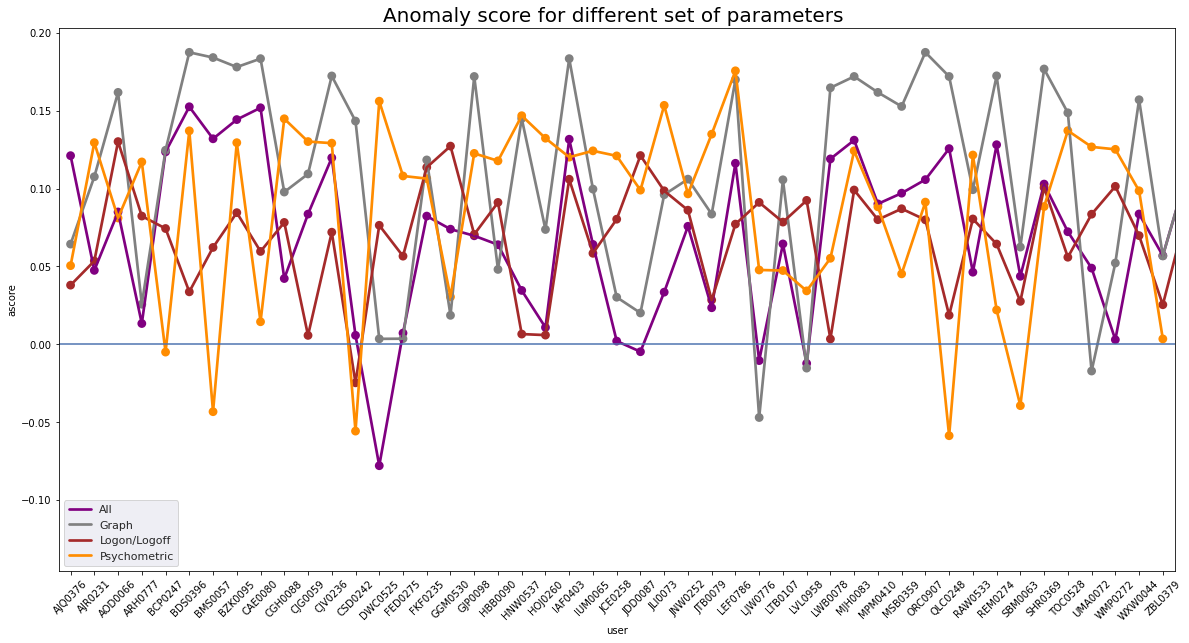

In [114]:
f, ax = plt.subplots(figsize = (20,10))
x_col='user'
y_col = 'ascore'
sns.set_theme(style="darkgrid")
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_all_parameters_result,color='purple')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_user_log_result,color='grey')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_psychometric_result,color='brown')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_device_file_full_result,color='darkorange')

ax.legend(handles=ax.lines[::len(df_all_parameters_result)+1], labels=["All","Graph","Logon/Logoff","Psychometric","Removable Media"])
#ax.set_xtickslabels(rotation = 45)
ax.axhline(0, ls='-')
ax.set_title('Anomaly score for different set of parameters ', size = 20)
plt.rcParams["axes.labelsize"] = 25
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

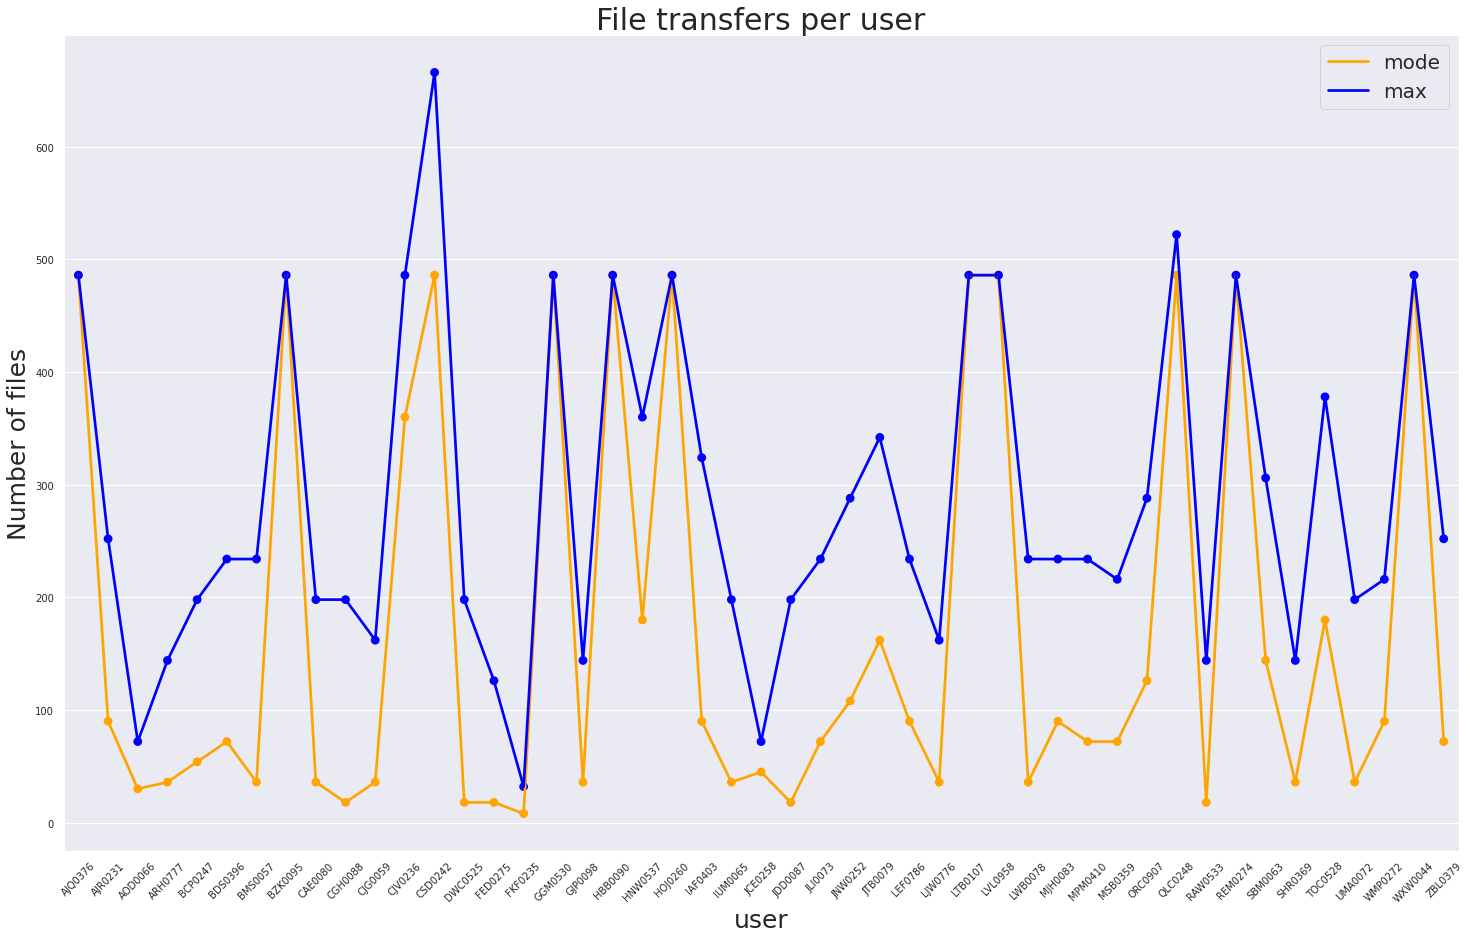

In [115]:
# file transfer per user
f, ax = plt.subplots(figsize = (25,15))
x_col='user'

sns.pointplot(ax=ax,x=x_col,y='mode_trasfers_per_user',data=df_files_stats_new, color='orange')
sns.pointplot(ax=ax,x=x_col,y='max_transfers_per_user',data=df_files_stats_new,color='blue')

ax.legend(handles=ax.lines[::len(df_files_stats)+1], labels=["mode", "max"], fontsize = 20)

ax.set_title('File transfers per user', size = 30)
plt.rcParams["axes.labelsize"] = 25
plt.ylabel("Number of files")
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
# plt.legend(fontsize=20)
plt.show()

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

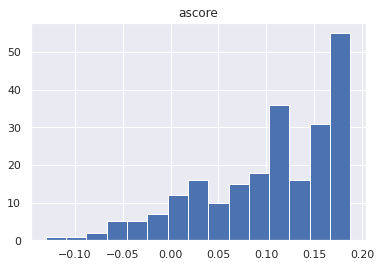

In [116]:
df_user_log_result.hist(bins = 15)

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

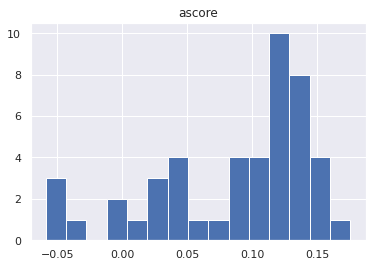

In [117]:
df_device_file_full_result.hist(bins = 15)

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

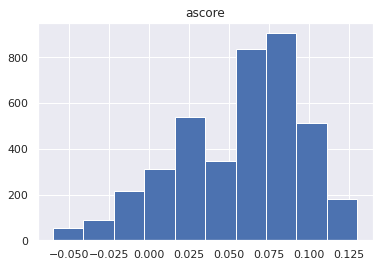

In [118]:
df_psychometric_result.hist()

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

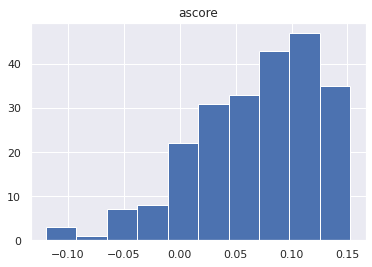

In [119]:
df_all_parameters_result.hist()

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

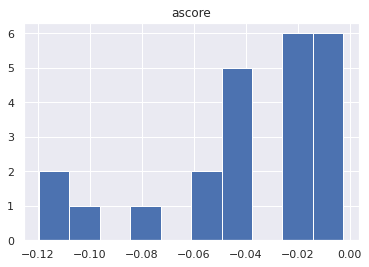

In [120]:
## All parameters combined
df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0].hist()

In [121]:
df_threat_users_all_params = df_all_parameters_result.loc[df_all_parameters_result['ascore'] < -0.065]
display(df_threat_users_all_params)

,user,ascore
13,ALC0100,-0.078069
56,CQS0899,-0.106887
77,FED0275,-0.110557
147,LWB0078,-0.119642


In [122]:
df_all_parameters_result = df_all_parameters[df_all_parameters.user.isin(df_threat_users_all_params.user)]
display(df_all_parameters_result.head())
display(df_all_parameters_result.shape)

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,O,C,E,A,N
13,ALC0100,25200,67486,26100,28800,25200,67486,26100,28800,34,11,38,14,48,28
56,CQS0899,606,85229,30600,36000,606,85229,30600,36000,27,41,38,41,24,36
77,FED0275,2462,81960,26640,28800,2462,81960,26640,28800,43,26,16,28,13,30
147,LWB0078,1104,86213,28920,28800,1104,86213,28920,28800,55,50,38,48,30,28


(4, 15)

In [123]:
display(df_all_parameters.on_max_ts.median())

31950.0

### Device and File

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

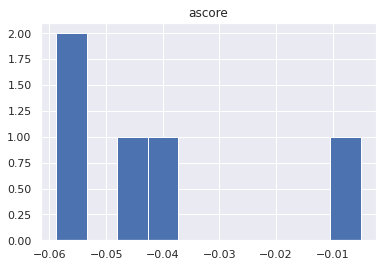

In [124]:
df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0].hist()

In [125]:
df_threat_users_device_file = df_device_file_full_result.loc[df_device_file_full_result['ascore'] <= -0]
display(df_threat_users_device_file.head())

,user,ascore
4,BCP0247,-0.005078
6,BMS0057,-0.043372
12,CSD0242,-0.055832
37,QLC0248,-0.058799
40,SBM0063,-0.039492


In [126]:
df_device_full_result = df_device_full[df_device_full.user.isin(df_threat_users_device_file.user)]
display(df_device_full.head())
print(f"File Mode Mean: "+ str(df_device_full.file_mode.mean()))
print(f"File Max Mean: "+ str(df_device_full.file_max.mean()))

,user,con_min_ts,con_max_ts,con_mode_ts,con_mean_ts,dcon_min_ts,dcon_max_ts,dcon_mode_ts,dcon_mean_ts,file_mode,file_max
0,AJQ0376,30401,68694,47203,43200,30401,68694,47203,43200,486,486
1,AJR0231,27100,56918,36335,36000,27100,56918,36335,36000,90,252
2,AOD0066,27693,55895,48513,36000,27693,55895,48513,36000,30,72
3,ARH0777,27756,59689,56795,39600,27756,59689,56795,39600,36,144
4,BCP0247,4870,84764,15638,39600,4870,84764,15638,39600,54,198


File Mode Mean: 170.27659574468086
File Max Mean: 287.1489361702128


### Logon and Logoff

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

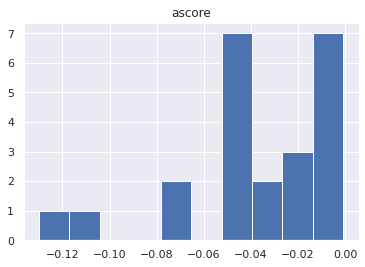

In [127]:
df_user_log_result.loc[df_user_log_result['ascore'] < 0].hist()

In [128]:
df_threat_users_log = df_user_log_result.loc[df_user_log_result['ascore'] <= -0.04]
display(df_threat_users_log)
display(df_threat_users_log.shape)

,user,ascore
29,BKA0340,-0.047109
56,CQS0899,-0.129985
65,DJS0406,-0.068265
77,FED0275,-0.106926
83,GFM0250,-0.046697
95,HML0060,-0.049432
144,LQD0409,-0.048270
147,LWB0078,-0.040457
178,RAW0533,-0.066616
180,RCG0105,-0.042001


(11, 2)

In [129]:
display(df_log_on_off_stats[df_log_on_off_stats.user.isin(df_threat_users_log.user)])

print(f'Max Mean:'+ str(df_log_on_off_stats.on_max_ts.mean()))
print(f'Max ts Median:'+ str(df_log_on_off_stats.on_max_ts.median()))


,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts
29,BKA0340,32400,72158,33480,32400,32400,72158,33480,32400
56,CQS0899,606,85229,30600,36000,606,85229,30600,36000
65,DJS0406,32400,33960,33720,32400,32400,33960,33720,32400
77,FED0275,2462,81960,26640,28800,2462,81960,26640,28800
83,GFM0250,464,85232,28800,25200,464,85232,28800,25200
95,HML0060,2052,84931,27900,25200,2052,84931,27900,25200
144,LQD0409,32400,72791,33300,36000,32400,72791,33300,36000
147,LWB0078,1104,86213,28920,28800,1104,86213,28920,28800
178,RAW0533,1401,71230,27900,25200,1401,71230,27900,25200
180,RCG0105,25200,58840,26400,25200,25200,58840,26400,25200


Max Mean:45270.821739130435
Max ts Median:31950.0


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

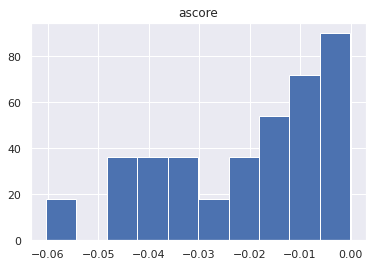

In [130]:
#psychometric_users_clean
df_psychometric_result.loc[df_psychometric_result['ascore'] < 0].hist()

In [131]:
df_threat_psycho = df_psychometric_result.loc[df_psychometric_result['ascore'] <= -0.04]
display(df_threat_psycho.head())
display(df_threat_psycho.shape)

,user,ascore
1167,ALC0100,-0.046415
1168,ALC0100,-0.046415
1169,ALC0100,-0.046415
1170,ALC0100,-0.046415
1171,ALC0100,-0.046415


(54, 2)

In [132]:
df_psychometric_users_clean_result = df_psychometric_users_clean[df_psychometric_users_clean.user_id.isin(df_threat_psycho.user)]
display(df_psychometric_users_clean_result.head())
display(df_psychometric_users_clean_result.shape)

,employee_name,user_id,O,C,E,A,N
1167,Arden Leo Chase,ALC0100,11,38,14,48,28
1168,Arden Leo Chase,ALC0100,11,38,14,48,28
1169,Arden Leo Chase,ALC0100,11,38,14,48,28
1170,Arden Leo Chase,ALC0100,11,38,14,48,28
1171,Arden Leo Chase,ALC0100,11,38,14,48,28


(54, 7)

In [135]:
df_all_parameters.isna().sum()

user           0
on_min_ts      0
on_max_ts      0
on_mode_ts     0
on_mean_ts     0
off_min_ts     0
off_max_ts     0
off_mode_ts    0
off_mean_ts    0
count          0
O              0
C              0
E              0
A              0
N              0
dtype: int64

In [136]:
df_all_parameters.columns

Index(['user', 'on_min_ts', 'on_max_ts', 'on_mode_ts', 'on_mean_ts',
       'off_min_ts', 'off_max_ts', 'off_mode_ts', 'off_mean_ts', 'count', 'O',
       'C', 'E', 'A', 'N'],
      dtype='object')

In [137]:

def anomaly_scatterplot(y,z, xlabtitle, ylabtitle):
    x = df_all_parameters['user']
    df = pd.concat([x, y, z], axis=1)
    df_matrix = df.drop(['user'], axis = 1)
    forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
    forest.fit(df_matrix)
    ascore = forest.decision_function(df_matrix)
    result = pd.DataFrame()
    result['user'] = x
    result_full = pd.merge(result, df, on = 'user')
    result_full['ascore'] = ascore
    result_full['Anomaly'] = np.where(result_full['ascore'] > 0, 1, -1)
    sns.set(rc={'figure.figsize':(12,10)})
    plot = sns.scatterplot(data=result_full, x = y, y = z, s = 125, hue = result_full['Anomaly'], palette=['red','green'])
    plt.xlabel(xlabtitle, fontsize = 18)
    plt.ylabel(ylabtitle, fontsize = 18)
    plt.legend(bbox_to_anchor=(1.01, 0.5),borderaxespad=0, title = "Anomaly" )
    plt.title('Anomaly Scatterplot', fontsize=20)
    plt.tight_layout()

    

    


    return plot

<AxesSubplot:title={'center':'Anomaly Scatterplot'}, xlabel='Minimum Login Time (in sec)', ylabel='Minimum Logoff Time (in sec)'>

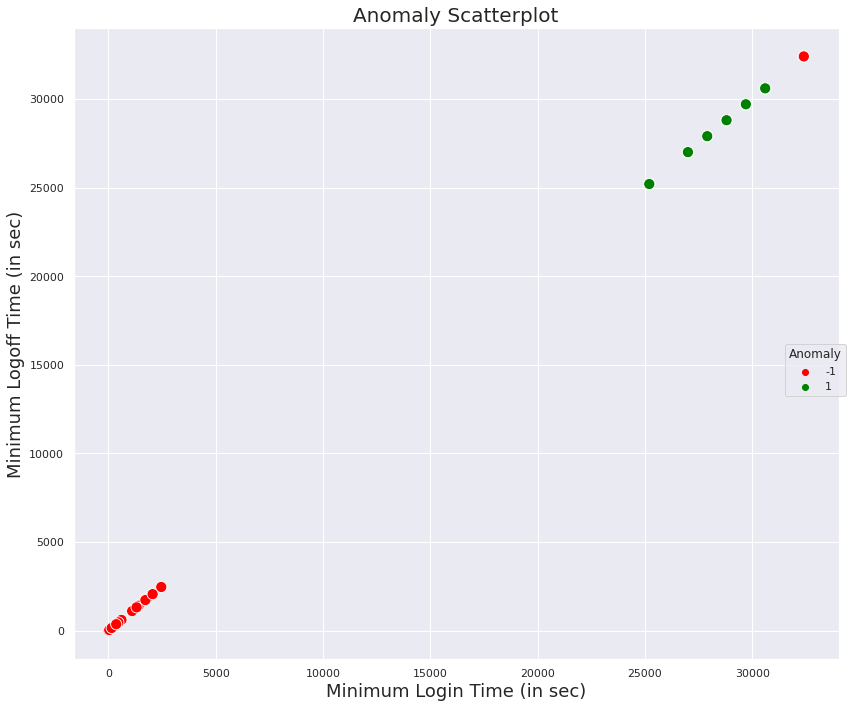

In [138]:
anomaly_scatterplot(df_all_parameters['on_min_ts'], df_all_parameters['off_min_ts'], 'Minimum Login Time (in sec)', 'Minimum Logoff Time (in sec)')